## Forward metropolis algorithm



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as pt
from tqdm import tqdm

In [2]:

def index(k):
    if(k==N-1):
        return -1;
    
    else: return k;

def Half_dist(H):
    delta = np.zeros(N)
    cp = L-A
    CPI = int(np.where(cp==np.min(cp))[0]) 
    CPR = int(np.where(A==np.min(A))[0]) 
    for i in range(N):
        
        if( i==0 and CPI==N-1):


            delta[i] = H[i]+(L-H[CPI]) -d
            
        elif(i==CPI+1):
            
            delta[i] = H[i]+(L-H[i-1]) -d
            
 
                
                
        else :
            delta[i] = H[i]-H[i-1]-d

    delta_2 = np.hstack((delta,delta))
    
    u = np.array([np.sum(delta_2[j:j+int(N/2.)]) for j in range(0,N)])
    
    return np.var(u),CPI,CPR


## <center> Heat bath rev. </center> 

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 461.30it/s]


0
1
2
3
4
5


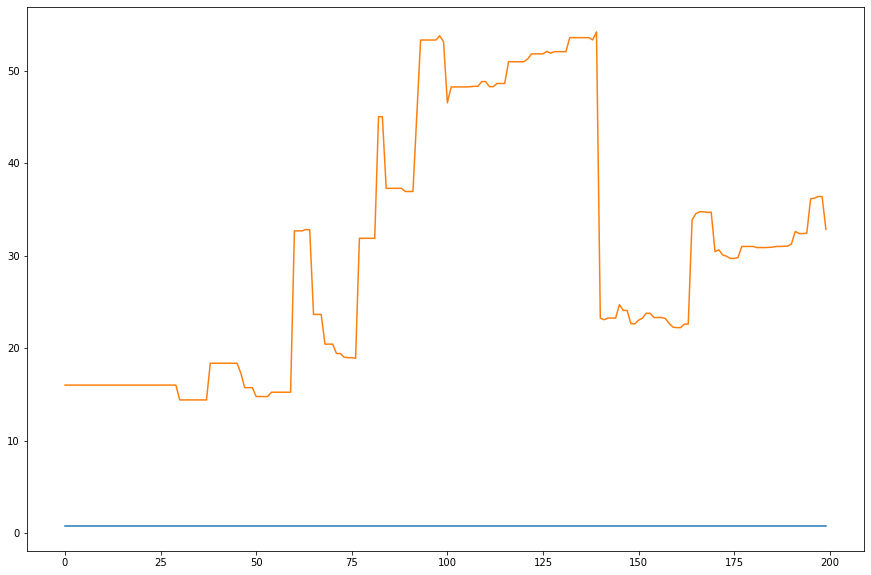

In [3]:
rho = 0.5
d = 0.4
N = 20

L = N*d/rho

l_free = (L-N*d)/float(N)
A = d*np.arange(1,N+1)


T_max = 200

T = []
WAR = []


for t in tqdm(range(T_max )):
    pick_sphere = np.random.randint(0,N)

    var,cpi,cpr = Half_dist(A)
    WAR.append(var)
    

    if(pick_sphere==cpi):
        
        ps = np.random.uniform(0,abs(L-A[index(pick_sphere)-1] + A[pick_sphere] -2*d))
        new_pos = (A[index(pick_sphere)-1])+ps
        if((L-new_pos)>0):
            A[cpi]= new_pos
        else :
            A[cpi] = new_pos-L

    elif(pick_sphere==cpr):
        
        print(cpr)    
        new_pos = np.random.uniform(A[index(pick_sphere)-1]+d,L+A[index(pick_sphere)+1]-d)
        if(new_pos>L):
            A[cpr] = new_pos-L
        else:
            A[cpr] = new_pos
        
    else:
        
        
        A[pick_sphere] = np.random.uniform(A[index(pick_sphere)-1]+d,A[index(pick_sphere)+1]-d)

       
    T.append(t)
    
KKK = ((N*N*l_free*l_free)/(4*N+4))*np.ones(T_max)    
    
plt.figure(figsize = (15,10)) 
plt.plot(T,KKK)
plt.plot(T,WAR)
plt.show()
    

44.44444444444446


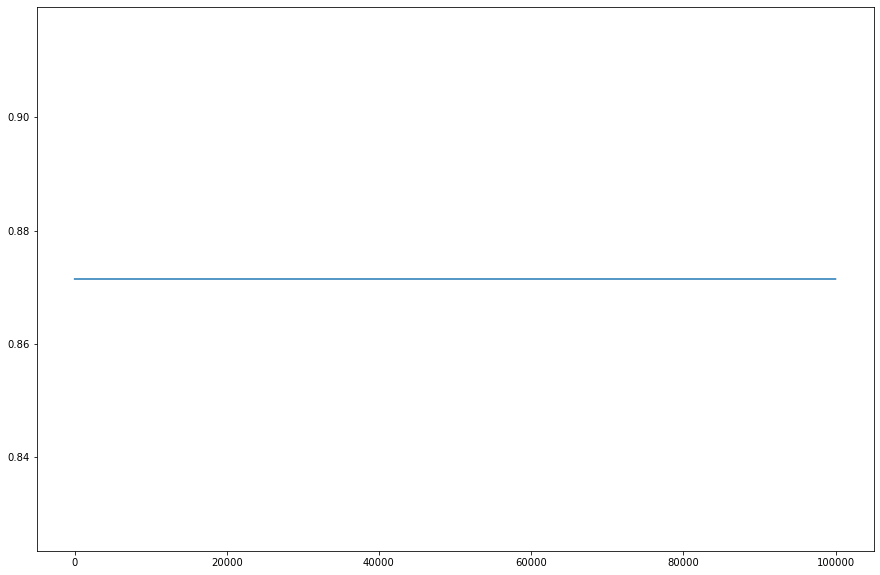

In [4]:
KKK = ((N*N*l_free*l_free)/(4*N+4))*np.ones(T_max)    
print((N*N*l_free*l_free)/4)
plt.figure(figsize = (15,10)) 
plt.plot(T,KKK)
#plt.plot(T,WAR)
plt.show()
    

100%|██████████████████████████████████████████████████████████████████████████| 17677/17677 [00:17<00:00, 1005.73it/s]


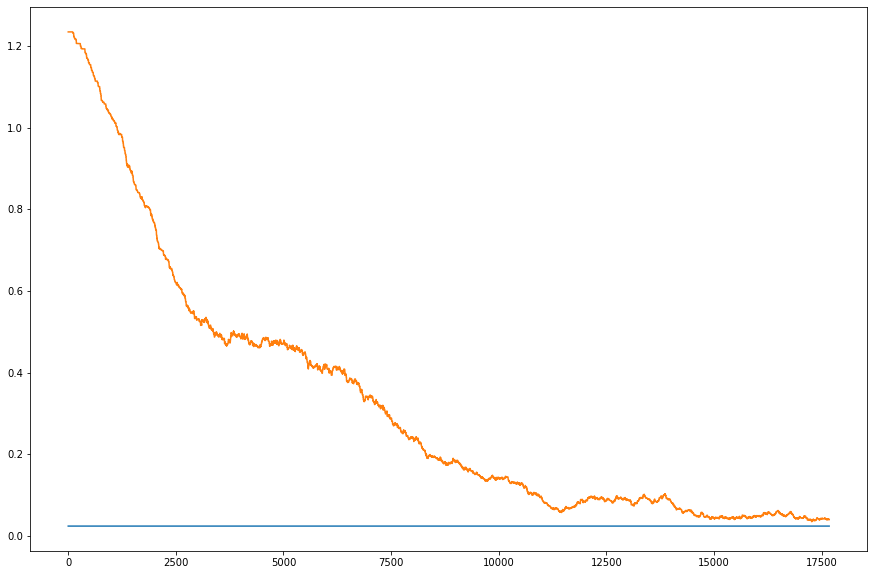

In [81]:
rho = 0.5
d = 0.4
N = 50

L = N*d/rho
#print(L)

l_free = (L-N*d)/float(N)
A = d*np.arange(1,N+1)


#A[[n for n in range(N)]] = A[[n-98 for n in range(N)]]


def Half_dist(H):
    delta = np.zeros(N)
    cp = L-A
    CPI = int(np.where(cp==np.min(cp))[0])    
    for i in range(N):
        
        if( i==0 and CPI==N-1):


            delta[i] = H[i]+(L-H[CPI]) -d
            
        elif(i==CPI+1):
            
            delta[i] = H[i]+(L-H[i-1]) -d
            
 
                
                
        else :
            delta[i] = H[i]-H[i-1]-d

    delta_2 = np.hstack((delta,delta))
    
    u = np.array([np.sum(delta_2[j:j+int(N/2.)]) for j in range(0,N)])
    
    return np.var(u),CPI

Half_dist(A)


T_max = int(N**2.5)

T = []
WAR = []
for t in tqdm(range(T_max )):
    pick_sphere = np.random.randint(0,N)
    epsilon = np.random.uniform(0,2.5*l_free)
    
    var,cpi = Half_dist(A)
    WAR.append(var)
    

    if(pick_sphere==cpi):
        new_distance = A[pick_sphere]+epsilon
        
        x_pseudo = L-new_distance
        if(x_pseudo>0):
            if(cpi==N-1):
  
                if(x_pseudo+A[0]>=d):
                    A[N-1] = new_distance
            else:
                if(x_pseudo+A[cpi+1]>=d):
                    A[cpi] = new_distance                
                
        else:
            if(cpi==N-1):
                
                if(-1*x_pseudo <A[0]-d):
                    A[N-1] = -1*x_pseudo
                    
            else:
                
                if(-1*x_pseudo <A[cpi+1]-d):
                
                    A[cpi] = -x_pseudo
                

            
            
                
                
    else:
        if(pick_sphere==N-1 and A[pick_sphere]+epsilon<A[0]-d):
                
        
                A[pick_sphere ] = A[pick_sphere ]+epsilon 
            
        elif(pick_sphere !=N-1 and A[pick_sphere]+epsilon<A[pick_sphere +1]-d):
            
            A[pick_sphere ] = A[pick_sphere ]+epsilon 
            
        

    T.append(t)
    
KKK = ((N*N*l_free*l_free)/(4*N+4))*np.ones(T_max)    
    
plt.figure(figsize = (15,10)) 
plt.plot(T,KKK)
plt.plot(T,WAR)
plt.show()
    

In [79]:
round(56.567)

57

In [53]:
input_seq = np.arange(1,11)
input_seq[[n for n in range(10)]] = input_seq[[n-1 for n in range(10)]]
input_seq

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9])

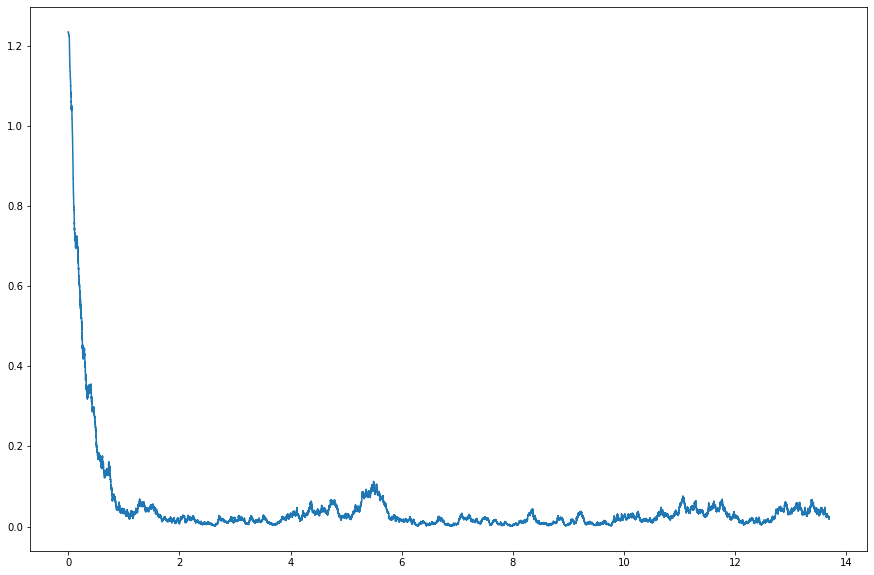

In [71]:
#KKK = ((N*N*l_free*l_free)/(4*N+4))*np.ones(T_max)    
    
plt.figure(figsize = (15,10)) 
#plt.plot(T,KKK)
TT = (1/N**2.5)*np.array(T)
plt.plot(TT,WAR)
plt.show()

In [49]:
BB = np.array([np.sum(aa[i:i+3]) for i in range(0,6)])
BB

array([ 6,  9, 12, 15, 12,  9])

In [45]:
BB

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])